# Heat Flow
Sean Wade

In [1]:
import numpy as np
import scipy as sp
from matplotlib import pyplot as plt
from matplotlib import animation
import seaborn
from __future__ import division, print_function

In [2]:
%matplotlib inline

## Problem 1

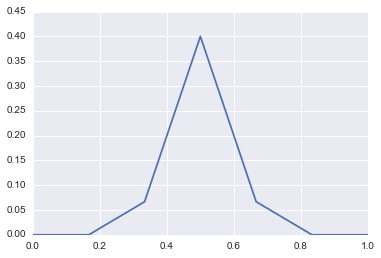

In [3]:
u0 = lambda x: 2 * np.maximum(.2 - abs(x - .5), 0)
x = np.linspace(0, 1, 7)
plt.plot(x, u0(x))
plt.show()

In [6]:
def u_i(a, b, n, n1, n2, nu, U):
    k = (b-a) / n2
    h = (b-a) / n1
    lmbda = nu*k / h**2
    A = np.diag(np.ones(n1+1)) - np.diag(2*lmbda*np.ones(n1+1)) 
    A += np.diag(np.ones(n1) * lmbda, k=-1)
    A += np.diag(np.ones(n1) * lmbda, k=1)
    return np.linalg.matrix_power(A, n).dot(U)

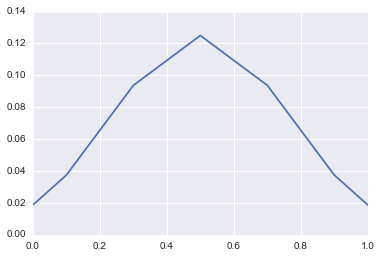

In [7]:
x = np.linspace(0, 1, 11)
U = u0(x)
u10 = u_i(0, 1, 6, 10, 10, .05, U)
plt.plot(x, u10)
plt.show()

## Problem 2

*Note: To run the animation make sure to not have matplotlib inline at the top*

In [14]:
def heat_animation(res=140): 
    # Make the x and y data.
    x = np.linspace(-12, 12, res+1)
    y = np.maximum(1-x**2, 0)
    
    # Initialize a matplotlib figure.
    f = plt.figure()
    
    # Set the x and y axes by constructing an axes object.
    plt.axes(xlim=(-12,12), ylim=(0,1))
    
    # Plot an empty line to use in the animation.
    # Notice that we are unpacking a tuple of length 1.
    line, = plt.plot([], [])
    
    # Define an animation function that will update the line to
    # reflect the desired data for the ith frame.
    def animate(i):
        # Set the data for updated version of the line.
        line.set_data(x, np.linalg.matrix_power(A, i).dot(y))
        # Notice that this returns a tuple of length 1.
        return line,
    
    a = animation.FuncAnimation(f, animate, frames=y.size, interval=20)
    plt.show()

In [15]:
nu = 1
a, b = -12, 12
n, n2 = 140, 70
k = 1 / n2
h = 24 / n1
lmbda = nu*k / h**2
A = np.diag(np.ones(n1+1)) - np.diag(2*lmbda*np.ones(n1+1))
A += np.diag(np.ones(n1) * lmbda, k=-1)
A += np.diag(np.ones(n1) * lmbda, k=1)
heat_animation()

In [17]:
n2 = 66
k = 1/n2
lmbda = nu*k/h**2
A = np.diag(np.ones(n1+1)) - np.diag(2*lmbda*np.ones(n1+1))
A += np.diag(np.ones(n1) * lmbda, k=-1)
A += np.diag(np.ones(n1) * lmbda, k=1)
heat_animation()

## Problem 3

In [55]:
u = lambda x, t: np.maximum(1-x**2, t)

def crank_nicol(fctn=u, x_int=140, t_int=70, xa=-12, xb=12, ta=0, tb=1, nu=1.):
    x = np.linspace(xa, xb, x_int+1)
    t = np.linspace(ta, tb, t_int+1)
    h = np.float(xb-xa)/x_int
    k = np.float(tb-ta)/t_int
    u_j = u(x, 0)
    lmbda = nu*k / (2*h**2)
    A = np.diag(np.ones(x_int+1)) - np.diag(2*lmbda*np.ones(x_int+1))
    A += np.diag(np.ones(x_int) * lmbda, k=-1)
    A += np.diag(np.ones(x_int) * lmbda, k=1)
    B = np.diag(np.ones(x_int+1))
    B += np.diag(2*lmbda*np.ones(x_int+1))
    B += np.diag(-np.ones(x_int) * lmbda, k=-1)
    B += np.diag(-np.ones(x_int) * lmbda, k=1)

    for i in xrange(t_int):
        u_j = np.linalg.solve(B, A.dot(u_j))
    return u_j

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  if __name__ == '__main__':
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:9: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


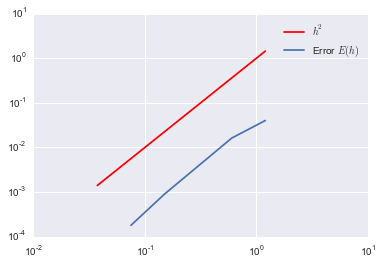

In [56]:
soln = crank_nicol(x_int = 640, t_int=640)[::(640/20)]
solutions = []

h_size = []
x_int_size = [20, 40, 80, 160, 320, 640]

for i in x_int_size:
    solns = crank_nicol(x_int=i, t_int=i)
    solns = solns[::(i/20)]
    sol = np.max(np.abs(solns - soln))
    solutions.append(sol)
    h_size.append(24/i)

plt.loglog(h_size, np.array(h_size)**2, 'r', label = "$h^2$")
plt.loglog(h_size, solutions, label = "Error $E(h)$")
plt.legend()
plt.show()